# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#OpenWeatherMap URL
url = "http://api.openweathermap.org/data/2.5/weather"

#API Parameters
params = {
     "appid": api_keys.api_key,
    "q": "",
    "units": "imperial"
         }

cityData = []
counter = 0
cityCount = str(len(cities))

print("Beginning Data Retrieval"+"\n"+"---------------------------------")
#iterate through each city in cities
for city in cities:
    try:
        #replace space before passing it to params
        cityTemp = city.replace(" ", "%20")
        #pass city to params
        params["q"] = cityTemp
        #get call
        owmResponse = requests.get(url, params=params).json()
        #append city response/data to cityData list
        cityData.append(owmResponse)
        counter=counter+1
        #print out log 
        print(f"Processing Record {counter} of {cityCount} | {city}")
    except KeyError:
        print("City not found. Skipping.....")
        
print("---------------------------------"+"\n"+"Data Retrieval Complete"+"\n"+"---------------------------------")

Beginning Data Retrieval
---------------------------------
Processing Record 1 of 621 | albany
Processing Record 2 of 621 | jamestown
Processing Record 3 of 621 | silver city
Processing Record 4 of 621 | chokurdakh
Processing Record 5 of 621 | ellensburg
Processing Record 6 of 621 | hasaki
Processing Record 7 of 621 | ribeira grande
Processing Record 8 of 621 | tasiilaq
Processing Record 9 of 621 | kaitangata
Processing Record 10 of 621 | yellowknife
Processing Record 11 of 621 | port alfred
Processing Record 12 of 621 | illoqqortoormiut
Processing Record 13 of 621 | hurricane
Processing Record 14 of 621 | georgetown
Processing Record 15 of 621 | port lincoln
Processing Record 16 of 621 | lucapa
Processing Record 17 of 621 | lincoln
Processing Record 18 of 621 | kirakira
Processing Record 19 of 621 | wanning
Processing Record 20 of 621 | cherskiy
Processing Record 21 of 621 | saint-philippe
Processing Record 22 of 621 | hermanus
Processing Record 23 of 621 | brae
Processing Record 24 o

Processing Record 207 of 621 | marzuq
Processing Record 208 of 621 | hambantota
Processing Record 209 of 621 | rawson
Processing Record 210 of 621 | nemuro
Processing Record 211 of 621 | nyurba
Processing Record 212 of 621 | hofn
Processing Record 213 of 621 | kidal
Processing Record 214 of 621 | ishigaki
Processing Record 215 of 621 | valparaiso
Processing Record 216 of 621 | provideniya
Processing Record 217 of 621 | ankara
Processing Record 218 of 621 | muravlenko
Processing Record 219 of 621 | grand river south east
Processing Record 220 of 621 | esperance
Processing Record 221 of 621 | pervomayskoye
Processing Record 222 of 621 | bandarbeyla
Processing Record 223 of 621 | belmonte
Processing Record 224 of 621 | asenovgrad
Processing Record 225 of 621 | araouane
Processing Record 226 of 621 | el ocote
Processing Record 227 of 621 | abu dhabi
Processing Record 228 of 621 | cabedelo
Processing Record 229 of 621 | yulara
Processing Record 230 of 621 | shimoda
Processing Record 231 of 

Processing Record 410 of 621 | inhambane
Processing Record 411 of 621 | garissa
Processing Record 412 of 621 | aquiraz
Processing Record 413 of 621 | umzimvubu
Processing Record 414 of 621 | cassino
Processing Record 415 of 621 | san jeronimo
Processing Record 416 of 621 | atbasar
Processing Record 417 of 621 | saint-ambroise
Processing Record 418 of 621 | caravelas
Processing Record 419 of 621 | porto novo
Processing Record 420 of 621 | potam
Processing Record 421 of 621 | tabou
Processing Record 422 of 621 | nizhniy kuranakh
Processing Record 423 of 621 | saskylakh
Processing Record 424 of 621 | nizhneyansk
Processing Record 425 of 621 | inta
Processing Record 426 of 621 | uyuni
Processing Record 427 of 621 | port hardy
Processing Record 428 of 621 | verkhnyaya inta
Processing Record 429 of 621 | klaksvik
Processing Record 430 of 621 | sargur
Processing Record 431 of 621 | rakaia
Processing Record 432 of 621 | mount gambier
Processing Record 433 of 621 | shatrovo
Processing Record 43

Processing Record 614 of 621 | buraydah
Processing Record 615 of 621 | domoni
Processing Record 616 of 621 | korem
Processing Record 617 of 621 | bollnas
Processing Record 618 of 621 | hvide sande
Processing Record 619 of 621 | satipo
Processing Record 620 of 621 | kang
Processing Record 621 of 621 | zhigansk
---------------------------------Data Retrieval Complete
---------------------------------


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [51]:
#create temp list for each of the dataframe column
cityLst = []
cloudinessLst = []
countryLst = []
dateLst = []
humidityLst = []
latLst = []
lngLst = []
maxTempLst = []
windSpeedLst =[]
counter = 0

#iterate through each city object in cityData 
for city in cityData:
    try:
        #add city data to all the lists
        counter = counter+1
        cityLst.append(city["name"])
        cloudinessLst.append(city["clouds"]["all"])
        countryLst.append(city["sys"]["country"])
        dateLst.append(city["dt"])
        humidityLst.append(city["main"]["humidity"])
        latLst.append(city["coord"]["lat"])
        lngLst.append(city["coord"]["lon"])
        maxTempLst.append(city["main"]["temp_max"])
        windSpeedLst.append(city["wind"]["speed"])
    except KeyError:
        "City {counter} not found."
      


    
#combine all temp lists to create dataframe
cityData_df = pd.DataFrame({"City": cityLst, "Cloudiness": cloudinessLst
                           , "Country": countryLst, "Date": dateLst
                           , "Humidity": humidityLst, "Lat": latLst
                           , "Lng": lngLst, "Max Temp": maxTempLst
                           , "Wind Speed": windSpeedLst})

    
#cityData

In [60]:
#display city data count
cityData_df.count()

City          456
Cloudiness    456
Country       456
Date          456
Humidity      456
Lat           456
Lng           456
Max Temp      456
Wind Speed    456
dtype: int64

In [61]:
#display first 5 row of data from cityData dataframe
cityData_df.head(5)

#export dataframe to csv file
cityData_df.to_csv(output_data_file)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,90,US,1540104840,70,42.65,-73.75,46.40,9.17
1,Jamestown,0,AU,1540105822,29,-33.21,138.60,74.05,6.93
2,Chokurdakh,20,RU,1540105836,76,70.62,147.90,11.95,11.07
3,Ellensburg,1,US,1540104900,75,47.00,-120.55,46.40,2.46
4,Hasaki,20,JP,1540103400,42,35.73,140.83,68.00,9.17


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

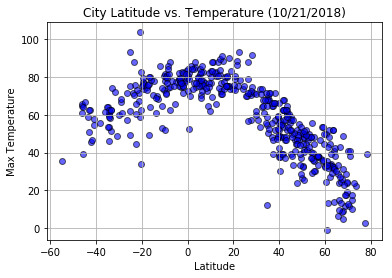

In [79]:
#declare today's date
date = datetime.datetime.today().strftime("%m/%d/%Y")

#configure plot size
plt.figure(figsize=(6,4))

#create plot
plt.scatter(cityData_df["Lat"], cityData_df["Max Temp"], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#add other plot properties
plt.grid(True)
plt.title("City Latitude vs. Temperature ("+ date +")")
plt.ylabel("Max Temperature")
plt.xlabel('Latitude')

#export plot
plt.savefig("latVSmaxtemp.png")

#### Latitude vs. Humidity Plot

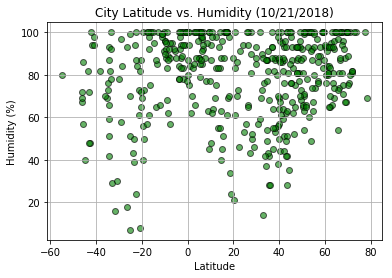

In [80]:
#configure plot size
plt.figure(figsize=(6,4))

#create plot
plt.scatter(cityData_df["Lat"], cityData_df["Humidity"], c='green',alpha=.6, linewidth=1, edgecolor='black')

#add other plot properties
plt.grid(True)
plt.title("City Latitude vs. Humidity ("+ date +")")
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')

#export plot
plt.savefig("latVShumidity.png")

#### Latitude vs. Cloudiness Plot

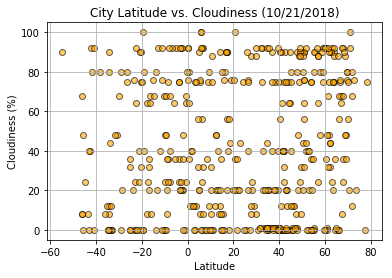

In [81]:
#configure plot size
plt.figure(figsize=(6,4))

#create plot
plt.scatter(cityData_df["Lat"], cityData_df["Cloudiness"], c='orange',alpha=.6, linewidth=1, edgecolor='black')

#add other plot properties
plt.grid(True)
plt.title("City Latitude vs. Cloudiness ("+ date +")")
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')

#export plot
plt.savefig("latVScloudiness.png")

#### Latitude vs. Wind Speed Plot

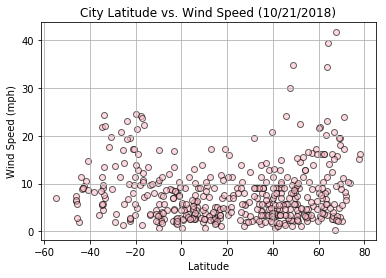

In [83]:
#configure plot size
plt.figure(figsize=(6,4))

#create plot
plt.scatter(cityData_df["Lat"], cityData_df["Wind Speed"], c='pink',alpha=.6, linewidth=1, edgecolor='black')

#add other plot properties
plt.grid(True)
plt.title("City Latitude vs. Wind Speed ("+ date +")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')

#export plot
plt.savefig("latVSwindspeed.png")